## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


### l1

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0719 09:41:29.500695 19336 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0719 09:41:29.502678 19336 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 09:41:29.542854 19336 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 09:41:29.546840 19336 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 09:41:29.556743 19336 depr

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0719 09:41:29.966437 19336 deprecation.py:323] From C:\Users\Rosa\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 308us/step - loss: 198.6785 - acc: 0.2388 - val_loss: 41.1698 - val_acc: 0.2426
Epoch 2/50
50000/50000 [==============================] - 16s 319us/step - loss: 19.1353 - acc: 0.1165 - val_loss: 7.2718 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 13s 267us/step - loss: 4.0988 - acc: 0.0981 - val_loss: 2.6473 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 13s 258us/step - loss: 2.4864 - acc: 0.0977 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.4626 - acc: 0.0989 - val_loss

50000/50000 [==============================] - 19s 373us/step - loss: 6.0382 - acc: 0.2528 - val_loss: 5.8440 - val_acc: 0.3240
Epoch 2/50
50000/50000 [==============================] - 20s 410us/step - loss: 5.7493 - acc: 0.3517 - val_loss: 5.6673 - val_acc: 0.3731
Epoch 3/50
50000/50000 [==============================] - 16s 310us/step - loss: 5.6016 - acc: 0.3800 - val_loss: 5.5328 - val_acc: 0.3984
Epoch 4/50
50000/50000 [==============================] - 13s 270us/step - loss: 5.4801 - acc: 0.4011 - val_loss: 5.4269 - val_acc: 0.4060
Epoch 5/50
50000/50000 [==============================] - 14s 280us/step - loss: 5.3691 - acc: 0.4197 - val_loss: 5.3235 - val_acc: 0.4221
Epoch 6/50
50000/50000 [==============================] - 14s 281us/step - loss: 5.2704 - acc: 0.4312 - val_loss: 5.2275 - val_acc: 0.4334
Epoch 7/50
50000/50000 [==============================] - 14s 282us/step - loss: 5.1737 - acc: 0.4431 - val_loss: 5.1509 - val_acc: 0.4364
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 20s 404us/step - loss: 2.0165 - acc: 0.2796 - val_loss: 1.8596 - val_acc: 0.3486
Epoch 2/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.8040 - acc: 0.3707 - val_loss: 1.7568 - val_acc: 0.3836
Epoch 3/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.7243 - acc: 0.3976 - val_loss: 1.7059 - val_acc: 0.4021
Epoch 4/50
50000/50000 [==============================] - 15s 306us/step - loss: 1.6674 - acc: 0.4146 - val_loss: 1.6399 - val_acc: 0.4263
Epoch 5/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.6182 - acc: 0.4337 - val_loss: 1.6019 - val_acc: 0.4352
Epoch 6/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.5769 - acc: 0.4461 - val_loss: 1.5716 - val_acc: 0.4475
Epoch 7/50
50000/50000 [==============================] - 19s 373us/step - loss: 1.5419 - acc: 0.4588 - val_loss: 1.5397 - val_acc: 0.4586
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.8192 - acc: 0.3628 - val_loss: 1.7805 - val_acc: 0.3783
Epoch 3/50
50000/50000 [==============================] - 15s 305us/step - loss: 1.7331 - acc: 0.3942 - val_loss: 1.7135 - val_acc: 0.4073
Epoch 4/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.6735 - acc: 0.4157 - val_loss: 1.6577 - val_acc: 0.4220
Epoch 5/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.6252 - acc: 0.4287 - val_loss: 1.6126 - val_acc: 0.4411
Epoch 6/50
50000/50000 [==============================] - 17s 336us/step - loss: 1.5844 - acc: 0.4436 - val_loss: 1.5866 - val_acc: 0.4440
Epoch 7/50
50000/50000 [==============================] - 16s 319us/step - loss: 1.5504 - acc: 0.4570 - val_loss: 1.5556 - val_acc: 0.4529
Epoch 8/50
50000/50000 [==============================] - 18s 351us/step - loss: 1.5204 - acc: 0.4665 - val_loss: 1.5257 - val_acc: 0.4595
Epoch 9/50
50000/50000 [===

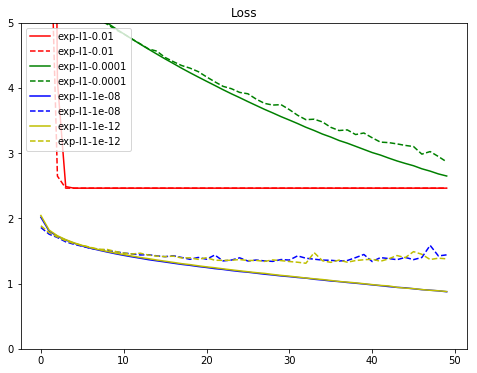

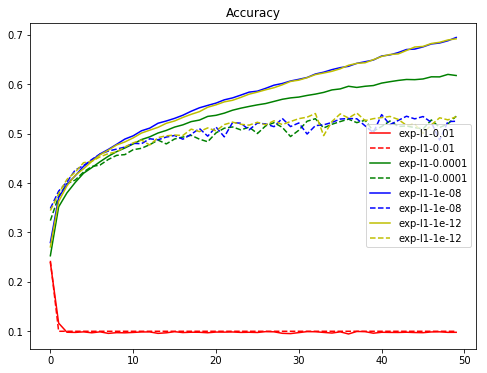

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### l1_l2

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 372us/step - loss: 18.8007 - acc: 0.2805 - val_loss: 17.3540 - val_acc: 0.3351
Epoch 2/50
50000/50000 [==============================] - 18s 365us/step - loss: 16.1388 - acc: 0.3619 - val_loss: 14.9716 - val_acc: 0.3802
Epoch 3/50
50000/50000 [==============================] - 16s 325us/step - loss: 13.9518 - acc: 0.3837 - val_loss: 12.9640 - val_acc: 0.3967
Epoch 4/50
50000/50000 [==============================] - 20s 396us/step - loss: 12.1038 - acc: 0.3962 - val_loss: 11.2699 - val_acc: 0.4020
Epoch 5/50
50000/50000 [==============================] - 19s 376us/step - loss: 10.5326 - acc: 0.4068 - val_loss: 9.8170 - val_acc: 0.4143
Epoch 6/50
50000/50000 [==============================] - 16s 319us/step - loss: 9.1958 - acc: 0.4135 - val_loss: 8.5933 - val_acc: 0.4138
Epoch 7/50
50000/50000 [==============================] - 17s 332us/step - loss: 8.0562 - acc: 0.4194 - val

50000/50000 [==============================] - 15s 300us/step - loss: 15.0982 - acc: 0.2693 - val_loss: 13.9691 - val_acc: 0.3391
Epoch 2/50
50000/50000 [==============================] - 14s 281us/step - loss: 13.0304 - acc: 0.3571 - val_loss: 12.1449 - val_acc: 0.3712
Epoch 3/50
50000/50000 [==============================] - 14s 278us/step - loss: 11.3522 - acc: 0.3810 - val_loss: 10.6075 - val_acc: 0.3864
Epoch 4/50
50000/50000 [==============================] - 14s 279us/step - loss: 9.9368 - acc: 0.3972 - val_loss: 9.2969 - val_acc: 0.4002
Epoch 5/50
50000/50000 [==============================] - 14s 284us/step - loss: 8.7357 - acc: 0.4065 - val_loss: 8.1963 - val_acc: 0.4103
Epoch 6/50
50000/50000 [==============================] - 14s 283us/step - loss: 7.7127 - acc: 0.4147 - val_loss: 7.2513 - val_acc: 0.4186
Epoch 7/50
50000/50000 [==============================] - 14s 282us/step - loss: 6.8402 - acc: 0.4229 - val_loss: 6.4484 - val_acc: 0.4236
Epoch 8/50
50000/50000 [========

Epoch 2/50
50000/50000 [==============================] - 15s 307us/step - loss: 13.0140 - acc: 0.3600 - val_loss: 12.1229 - val_acc: 0.3727
Epoch 3/50
50000/50000 [==============================] - 15s 306us/step - loss: 11.3403 - acc: 0.3817 - val_loss: 10.5963 - val_acc: 0.3883
Epoch 4/50
50000/50000 [==============================] - 15s 304us/step - loss: 9.9289 - acc: 0.3970 - val_loss: 9.3017 - val_acc: 0.3927
Epoch 5/50
50000/50000 [==============================] - 15s 305us/step - loss: 8.7283 - acc: 0.4094 - val_loss: 8.1892 - val_acc: 0.4103
Epoch 6/50
50000/50000 [==============================] - 15s 305us/step - loss: 7.7071 - acc: 0.4141 - val_loss: 7.2521 - val_acc: 0.4137
Epoch 7/50
50000/50000 [==============================] - 15s 305us/step - loss: 6.8357 - acc: 0.4208 - val_loss: 6.4395 - val_acc: 0.4251
Epoch 8/50
50000/50000 [==============================] - 15s 310us/step - loss: 6.0909 - acc: 0.4284 - val_loss: 5.7594 - val_acc: 0.4253
Epoch 9/50
50000/50000 

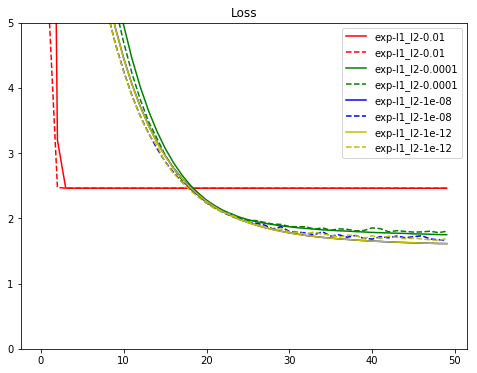

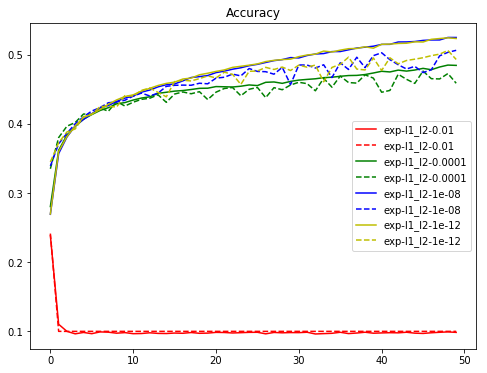

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()